# K Nearest Neighbors

The KNN model is simple to fit, but time-consuming to predict on, especially on this large dataset. It also has relatively few hyperparameters to tune, so it may not improve much. Still, it performed well in the baseline, so it may work well in the end.

In [1]:
import pandas as pd
from scripts import get_metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../data/cleaned_data.csv', index_col='id')
df

,status_group,longitude,latitude,population,construction_year,funder_communal standpipe,funder_communal standpipe multiple,funder_hand pump,funder_improved spring,funder_other,...,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,0.496455,0.168353,0.003541,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8776,functional,0.474167,0.892122,0.009148,0.943396,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34310,functional,0.731374,0.734967,0.008164,0.924528,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67743,non functional,0.826875,0.046394,0.001869,0.490566,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19728,functional,0.141899,0.922364,0.013692,0.852830,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,0.704287,0.788246,0.004066,0.735849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
27263,functional,0.525501,0.242120,0.001803,0.679245,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37057,functional,0.410685,0.272182,0.003836,0.924528,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
y = df['status_group']
X = df.drop(['status_group'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=212)

## Baseline Model

In [4]:
baseline = KNeighborsClassifier()
baseline.fit(X_train, y_train)
get_metrics(y_test, X_test, baseline)

{'accuracy': 0.7797979797979798,
 'f1': 0.7713946545972173,
 'precision': 0.7709936608722784,
 'recall': 0.7797979797979798}

## GridSearch CV

I found four hyperparameters that seemed like they might significantly impact the model's performance, but in reality only the first two are likely of much help. In the second pass of the GridSearchCV, I tried to narrow the values around the successful ones I had already found, while reducing the number of models to run to a more manageable size.

In [4]:
from sklearn.model_selection import GridSearchCV

In [6]:
param_grid = {
    'n_neighbors': [1, 5, 10], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [10, 20, 30, 40], # default 30
    'p': [1, 2] # default 2
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [1, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [8]:
knn_tuned = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10, p=1)
knn_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, knn_tuned)

{'accuracy': 0.7844444444444445,
 'f1': 0.7786650114084512,
 'precision': 0.7761680005340963,
 'recall': 0.7844444444444445}

In [5]:
param_grid = {
    'n_neighbors': [8, 10, 12], # default 5
    'weights': ['distance'], # default 'uniform'
    'leaf_size': [5, 10, 15], # default 30
    'p': [1] # default 2
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15], 'n_neighbors': [8, 10, 12],
                         'p': [1], 'weights': ['distance']},
             scoring='accuracy')

In [6]:
grid_search.best_params_

{'leaf_size': 15, 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

In [4]:
knn_tuned = KNeighborsClassifier(n_neighbors=12, weights='distance', leaf_size=15, p=1)
knn_tuned.fit(X_train, y_train)
get_metrics(y_test, X_test, knn_tuned)

{'accuracy': 0.7857239057239057,
 'f1': 0.7794444894980167,
 'precision': 0.7769044977516286,
 'recall': 0.7857239057239057}

## Bagging

In my baseline models, bagging decision trees saw significant improvements. I decided to attempt bagging more successful models. I'm not sure if this is actually good practice, but I was curious if this would improve the models or not.

In [4]:
from sklearn.ensemble import BaggingClassifier

In [6]:
knn_bagged = BaggingClassifier(KNeighborsClassifier(n_neighbors=12, weights='distance', leaf_size=15, p=1))  
knn_bagged.fit(X_train, y_train)
get_metrics(y_test, X_test, knn_bagged)

{'accuracy': 0.7852525252525252,
 'f1': 0.778485707736249,
 'precision': 0.7763541475578498,
 'recall': 0.7852525252525252}

## Confusion Matrix

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

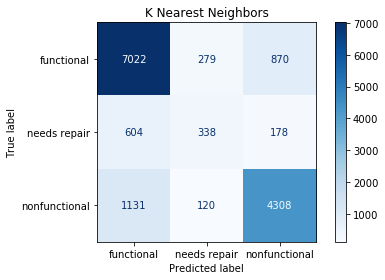

In [7]:
plot_confusion_matrix(knn_tuned, X_test, y_test, display_labels=['functional', 'needs repair', 'nonfunctional'], cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()
plt.savefig('../visualizations/knn-confusion-matrix.png')
plt.show()

## Conclusions

The K Nearest Neighbors model performed better than most in the baseline models, but didn't improve significantly with hyperparemeter tuning. This is because KNN has relatively few hyperparameters: n_neighbors and weights are the two that have the most effect on its performance. It also takes in incredibly long time to run on this large dataset, making it impractical to tune further. Bagging the model saw no improvement, and so I won't bag the final model.